# Exploración de Datos

In [337]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

In [346]:
combats = pd.read_csv('combats.csv')
pokedex = pd.read_csv('pokedex_(Update_04.21).csv')
pokemon = pd.read_csv('pokemon.csv')

In [348]:
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [7]:
pokemon.loc[pokemon.Name.isna()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


Falta Primeape

lo encontre aca: https://www.pkparaiso.com/pokemon/lista-pokemon.php

In [8]:
pokemon['Name'] = pokemon['Name'].fillna('Primeape')
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [341]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [10]:
#pokemon = pokemon.rename(columns = {'Name': 'name'})

In [11]:
#pokemon = pokemon[['#', 'name']]

In [12]:
print(pokedex.shape, pokemon.shape)

(1045, 51) (800, 12)


Hay pokemons que estan en pokedex.csv pero no en pokemon.csv ni en combats.csv

# Preparación de Datos

In [342]:
pokedex = pokedex.drop(['Unnamed: 0', 'german_name', 'japanese_name'],axis=1)

In [345]:
pokedex.head()

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318,45,49,49,65,65,45,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405,60,62,63,80,80,60,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525,80,82,83,100,100,80,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625,80,100,123,122,120,80,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309,39,52,43,60,50,65,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [15]:
names = dict(zip(pokemon['#'], pokemon['Name']))
combats_names = combats[['First_pokemon', 'Second_pokemon', 'Winner']].replace(names)
combats_names.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [16]:
dic = {}
for col in pokedex:
  dic[col] = col + '_1'
pokedex_1 = pokedex.rename(columns = dic)
pokedex_1.columns

Index(['pokedex_number_1', 'name_1', 'generation_1', 'status_1', 'species_1',
       'type_number_1', 'type_1_1', 'type_2_1', 'height_m_1', 'weight_kg_1',
       'abilities_number_1', 'ability_1_1', 'ability_2_1', 'ability_hidden_1',
       'total_points_1', 'hp_1', 'attack_1', 'defense_1', 'sp_attack_1',
       'sp_defense_1', 'speed_1', 'catch_rate_1', 'base_friendship_1',
       'base_experience_1', 'growth_rate_1', 'egg_type_number_1',
       'egg_type_1_1', 'egg_type_2_1', 'percentage_male_1', 'egg_cycles_1',
       'against_normal_1', 'against_fire_1', 'against_water_1',
       'against_electric_1', 'against_grass_1', 'against_ice_1',
       'against_fight_1', 'against_poison_1', 'against_ground_1',
       'against_flying_1', 'against_psychic_1', 'against_bug_1',
       'against_rock_1', 'against_ghost_1', 'against_dragon_1',
       'against_dark_1', 'against_steel_1', 'against_fairy_1'],
      dtype='object')

In [17]:
pokedex_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pokedex_number_1    1045 non-null   int64  
 1   name_1              1045 non-null   object 
 2   generation_1        1045 non-null   int64  
 3   status_1            1045 non-null   object 
 4   species_1           1045 non-null   object 
 5   type_number_1       1045 non-null   int64  
 6   type_1_1            1045 non-null   object 
 7   type_2_1            553 non-null    object 
 8   height_m_1          1045 non-null   float64
 9   weight_kg_1         1044 non-null   float64
 10  abilities_number_1  1045 non-null   int64  
 11  ability_1_1         1042 non-null   object 
 12  ability_2_1         516 non-null    object 
 13  ability_hidden_1    813 non-null    object 
 14  total_points_1      1045 non-null   int64  
 15  hp_1                1045 non-null   int64  
 16  attack

In [18]:
combats_names = combats_names.rename(columns = {'First_pokemon': 'name_1'})
combats_names.columns

Index(['name_1', 'Second_pokemon', 'Winner'], dtype='object')

In [19]:
df = pd.merge(combats_names, pokedex_1, on='name_1', how='left')

Lo mismo con el otro pokemon

In [20]:
dic = {}
for col in pokedex:
  dic[col] = col + '_2'
pokedex_2 = pokedex.rename(columns = dic)
pokedex_2.columns

Index(['pokedex_number_2', 'name_2', 'generation_2', 'status_2', 'species_2',
       'type_number_2', 'type_1_2', 'type_2_2', 'height_m_2', 'weight_kg_2',
       'abilities_number_2', 'ability_1_2', 'ability_2_2', 'ability_hidden_2',
       'total_points_2', 'hp_2', 'attack_2', 'defense_2', 'sp_attack_2',
       'sp_defense_2', 'speed_2', 'catch_rate_2', 'base_friendship_2',
       'base_experience_2', 'growth_rate_2', 'egg_type_number_2',
       'egg_type_1_2', 'egg_type_2_2', 'percentage_male_2', 'egg_cycles_2',
       'against_normal_2', 'against_fire_2', 'against_water_2',
       'against_electric_2', 'against_grass_2', 'against_ice_2',
       'against_fight_2', 'against_poison_2', 'against_ground_2',
       'against_flying_2', 'against_psychic_2', 'against_bug_2',
       'against_rock_2', 'against_ghost_2', 'against_dragon_2',
       'against_dark_2', 'against_steel_2', 'against_fairy_2'],
      dtype='object')

In [21]:
df = df.rename(columns = {'Second_pokemon': 'name_2'})
df.columns

Index(['name_1', 'name_2', 'Winner', 'pokedex_number_1', 'generation_1',
       'status_1', 'species_1', 'type_number_1', 'type_1_1', 'type_2_1',
       'height_m_1', 'weight_kg_1', 'abilities_number_1', 'ability_1_1',
       'ability_2_1', 'ability_hidden_1', 'total_points_1', 'hp_1', 'attack_1',
       'defense_1', 'sp_attack_1', 'sp_defense_1', 'speed_1', 'catch_rate_1',
       'base_friendship_1', 'base_experience_1', 'growth_rate_1',
       'egg_type_number_1', 'egg_type_1_1', 'egg_type_2_1',
       'percentage_male_1', 'egg_cycles_1', 'against_normal_1',
       'against_fire_1', 'against_water_1', 'against_electric_1',
       'against_grass_1', 'against_ice_1', 'against_fight_1',
       'against_poison_1', 'against_ground_1', 'against_flying_1',
       'against_psychic_1', 'against_bug_1', 'against_rock_1',
       'against_ghost_1', 'against_dragon_1', 'against_dark_1',
       'against_steel_1', 'against_fairy_1'],
      dtype='object')

In [22]:
df = pd.merge(df, pokedex_2, on='name_2', how='left')

In [23]:
df.columns

Index(['name_1', 'name_2', 'Winner', 'pokedex_number_1', 'generation_1',
       'status_1', 'species_1', 'type_number_1', 'type_1_1', 'type_2_1',
       'height_m_1', 'weight_kg_1', 'abilities_number_1', 'ability_1_1',
       'ability_2_1', 'ability_hidden_1', 'total_points_1', 'hp_1', 'attack_1',
       'defense_1', 'sp_attack_1', 'sp_defense_1', 'speed_1', 'catch_rate_1',
       'base_friendship_1', 'base_experience_1', 'growth_rate_1',
       'egg_type_number_1', 'egg_type_1_1', 'egg_type_2_1',
       'percentage_male_1', 'egg_cycles_1', 'against_normal_1',
       'against_fire_1', 'against_water_1', 'against_electric_1',
       'against_grass_1', 'against_ice_1', 'against_fight_1',
       'against_poison_1', 'against_ground_1', 'against_flying_1',
       'against_psychic_1', 'against_bug_1', 'against_rock_1',
       'against_ghost_1', 'against_dragon_1', 'against_dark_1',
       'against_steel_1', 'against_fairy_1', 'pokedex_number_2',
       'generation_2', 'status_2', 'species_2'

In [24]:
df.loc[(df.name_1 == "Charmander")]

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,species_1,type_number_1,type_1_1,type_2_1,height_m_1,weight_kg_1,abilities_number_1,ability_1_1,ability_2_1,ability_hidden_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,growth_rate_1,egg_type_number_1,egg_type_1_1,egg_type_2_1,percentage_male_1,egg_cycles_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,species_2,type_number_2,type_1_2,type_2_2,height_m_2,weight_kg_2,abilities_number_2,ability_1_2,ability_2_2,ability_hidden_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,growth_rate_2,egg_type_number_2,egg_type_1_2,egg_type_2_2,percentage_male_2,egg_cycles_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2
108,Charmander,Lampent,Charmander,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,608.0,5.0,Normal,Lamp Pokémon,2.0,Ghost,Fire,0.6,13.0,3.0,Flash Fire,Flame Body,Infiltrator,370.0,60.0,40.0,60.0,95.0,60.0,55.0,90.0,70.0,130.0,Medium Slow,1.0,Amorphous,NaN,50.0,20.0,0.0,0.00,2.0,1.0,0.50,0.5,0.00,0.5,2.0,1.0,1.00,0.25,2.0,2.0,1.0,2.0,0.5,0.5
1049,Charmander,Lickitung,Charmander,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,108.0,1.0,Normal,Licking Pokémon,1.0,Normal,NaN,1.2,65.5,3.0,Own Tempo,Oblivious,Cloud Nine,385.0,90.0,55.0,75.0,60.0,75.0,30.0,45.0,70.0,77.0,Medium Fast,1.0,Monster,NaN,50.0,20.0,1.0,1.00,1.0,1.0,1.00,1.0,2.00,1.0,1.0,1.0,1.00,1.00,1.0,0.0,1.0,1.0,1.0,1.0
3136,Charmander,Metang,Charmander,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,375.0,3.0,Normal,Iron Claw Pokémon,2.0,Steel,Psychic,1.2,202.5,2.0,Clear Body,NaN,Light Metal,420.0,60.0,75.0,100.0,55.0,80.0,50.0,3.0,35.0,147.0,Slow,1.0,Mineral,NaN,NaN,40.0,0.5,2.00,1.0,1.0,0.50,0.5,1.00,0.0,2.0,0.5,0.25,1.00,0.5,2.0,0.5,2.0,0.5,0.5
3687,Charmander,Abra,Abra,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,63.0,1.0,Normal,Psi Pokémon,1.0,Psychic,NaN,0.9,19.5,3.0,Synchronize,Inner Focus,Magic Guard,310.0,25.0,20.0,15.0,105.0,55.0,90.0,200.0,70.0,62.0,Medium Slow,1.0,Human-Like,NaN,75.0,20.0,1.0,1.00,1.0,1.0,1.00,1.0,0.50,1.0,1.0,1.0,0.50,2.00,1.0,2.0,1.0,2.0,1.0,1.0
5993,Charmander,Pidove,Charmander,4.0,1.0,Normal,Lizard Pokémon,1.0,Fire,NaN,0.6,8.5,2.0,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2.0,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,519.0,5.0,Normal,Tiny Pigeon Pokémon,2.0,Normal,Flying,0.3,2.1,3.0,Big Pecks,Super Luck,Rivalry,264.0,50.0,55.0,50.0,36.0,30.0,43.0,255.0,70.0,53.0,Medium Slow,1.0,Flying,NaN,50.0,15.0,1.0,1.00,1.0,2.0,0.50,2.0,1.00,1.0,0.0,1.0,1.00,0.50,2.0,

Revisar si hay valores NaN
 
 Los dropeamos ya que eran pokemons que estaban en el dataset de combates y no en la pokedex

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 97 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name_1              50000 non-null  object 
 1   name_2              50000 non-null  object 
 2   Winner              50000 non-null  object 
 3   pokedex_number_1    49556 non-null  float64
 4   generation_1        49556 non-null  float64
 5   status_1            49556 non-null  object 
 6   species_1           49556 non-null  object 
 7   type_number_1       49556 non-null  float64
 8   type_1_1            49556 non-null  object 
 9   type_2_1            25663 non-null  object 
 10  height_m_1          49556 non-null  float64
 11  weight_kg_1         49556 non-null  float64
 12  abilities_number_1  49556 non-null  float64
 13  ability_1_1         49556 non-null  object 
 14  ability_2_1         25777 non-null  object 
 15  ability_hidden_1    40390 non-null  object 
 16  tota

In [26]:
cantidad_nan = (df['pokedex_number_1'].isna().sum(), df['pokedex_number_2'].isna().sum())

print("Cantidad de valores NaN:", cantidad_nan)

Cantidad de valores NaN: (444, 398)


hay pokemons en combats que no estan en pokedex ??? Problema resuelto

In [27]:
df.loc[df.pokedex_number_1.isna()].head(5)

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,species_1,type_number_1,type_1_1,type_2_1,height_m_1,weight_kg_1,abilities_number_1,ability_1_1,ability_2_1,ability_hidden_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,growth_rate_1,egg_type_number_1,egg_type_1_1,egg_type_2_1,percentage_male_1,egg_cycles_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,species_2,type_number_2,type_1_2,type_2_2,height_m_2,weight_kg_2,abilities_number_2,ability_1_2,ability_2_2,ability_hidden_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,growth_rate_2,egg_type_number_2,egg_type_1_2,egg_type_2_2,percentage_male_2,egg_cycles_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2
74,Kyurem Black Kyurem,Nidoking,Kyurem Black Kyurem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,1.0,Normal,Drill Pokémon,2.0,Poison,Ground,1.4,62.0,3.0,Poison Point,Rivalry,Sheer Force,505.0,81.0,102.0,77.0,85.0,75.0,85.0,45.0,70.0,227.0,Medium Slow,2.0,Field,Monster,100.0,20.0,1.0,1.0,2.0,0.0,1.0,2.0,0.5,0.25,2.0,1.0,2.0,0.50,0.5,1.0,1.0,1.0,1.0,0.5
223,Basculin,Krabby,Basculin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,1.0,Normal,River Crab Pokémon,1.0,Water,NaN,0.4,6.5,3.0,Hyper Cutter,Shell Armor,Sheer Force,325.0,30.0,105.0,90.0,25.0,25.0,50.0,225.0,70.0,65.0,Medium Fast,1.0,Water 3,NaN,50.0,20.0,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0
275,Zygarde Half Forme,Monferno,Zygarde Half Forme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391.0,4.0,Normal,Playful Pokémon,2.0,Fire,Fighting,0.9,22.0,2.0,Blaze,NaN,Iron Fist,405.0,64.0,78.0,52.0,78.0,52.0,81.0,45.0,70.0,142.0,Medium Slow,2.0,Field,Human-Like,87.5,20.0,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.00,2.0,2.0,2.0,0.25,1.0,1.0,1.0,0.5,0.5,1.0
663,Kyurem Black Kyurem,Machoke,Kyurem Black Kyurem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,1.0,Normal,Superpower Pokémon,1.0,Fighting,NaN,1.5,70.5,3.0,Guts,No Guard,Steadfast,405.0,80.0,100.0,70.0,50.0,60.0,45.0,90.0,70.0,142.0,Medium Slow,1.0,Human-Like,NaN,75.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,2.0,2.0,0.50,0.5,1.0,1.0,0.5,1.0,2.0
687,Kyurem Black Kyurem,Panpour,Kyurem Black Kyurem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,515.0,5.0,Normal,Spray Pokémon,1.0,Water,NaN,0.6,13.5,2.0,Gluttony,NaN,Torrent,316.0,50.0,53.0,48.0,53.0,48.0,64.0,190.0,70.0,63.0,Medium Fast,1.0,Field,NaN,87.5,20.0,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


In [28]:
pokedex.loc[pokedex.name == 'Zygarde Half Forme']

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy


In [29]:
combats_names.loc[combats_names.name_1 == 'Zygarde Half Forme']

,name_1,Second_pokemon,Winner
275,Zygarde Half Forme,Monferno,Zygarde Half Forme
1181,Zygarde Half Forme,Cacturne,Zygarde Half Forme
1814,Zygarde Half Forme,Cinccino,Cinccino
2110,Zygarde Half Forme,Lickilicky,Zygarde Half Forme
2787,Zygarde Half Forme,Sneasel,Sneasel
3913,Zygarde Half Forme,Shedinja,Zygarde Half Forme
4305,Zygarde Half Forme,Primal Groudon,Zygarde Half Forme
4443,Zygarde Half Forme,Infernape,Infernape
5945,Zygarde Half Forme,Venomoth,Zygarde Half Forme
6506,Zygarde Half Forme,Weavile,Weavile


In [30]:
df = df.dropna(subset="pokedex_number_1")
df = df.dropna(subset="pokedex_number_2")

Cambiamos Winner por 0/1, donde 0 es el primer pokemon y 1 el segundo

In [31]:
df.Winner[df.Winner == df.name_1] = 0
df.Winner[df.Winner == df.name_2] = 1

<ipython-input-31-254939ddb546>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Winner[df.Winner == df.name_2] = 1


In [32]:
df.type_number_2.unique()

array([2., 1.])

In [33]:
df.type_1_1.unique()

array(['Rock', 'Grass', 'Fairy', 'Fire', 'Bug', 'Psychic', 'Fighting',
       'Water', 'Normal', 'Ground', 'Electric', 'Dark', 'Ice', 'Steel',
       'Ghost', 'Dragon', 'Flying', 'Poison'], dtype=object)

Creamos una columna con el numero del segundo tipo del pokemon (0 si no tiene)

Ponemos en variable numerica el primer tipo del pokemon 


In [34]:
lista = ['Rock', 'Grass', 'Fairy', 'Fire', 'Bug', 'Psychic', 'Fighting',
       'Water', 'Normal', 'Ground', 'Electric', 'Dark', 'Ice', 'Steel',
       'Ghost', 'Dragon', 'Flying', 'Poison']

values = [n for n in range(1, len(lista)+1)]

dictionary = dict(zip(lista, values))

for l in lista:
  df.loc[df['type_1_1'] == l, 'type_number_1'] = dictionary[l] 
  df.loc[df['type_1_2'] == l, 'type_number_2'] = dictionary[l]
  df.loc[df['type_2_1'] == l, 'type_number_2_1'] = dictionary[l]
  df.loc[df['type_2_2'] == l, 'type_number_2_2'] = dictionary[l]



In [35]:
df.loc[df['type_number_2_2'].isna(), 'type_number_2_2'] = 0
df.loc[df['type_number_2_1'].isna(), 'type_number_2_1'] = 0

In [36]:
df.type_number_2.unique() 

array([ 2.,  1.,  6., 16.,  5., 14., 13., 15.,  8., 11., 12.,  4.,  9.,
       18.,  3.,  7., 10., 17.])

In [37]:
df.head()

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,species_1,type_number_1,type_1_1,type_2_1,height_m_1,weight_kg_1,abilities_number_1,ability_1_1,ability_2_1,ability_hidden_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,growth_rate_1,egg_type_number_1,egg_type_1_1,egg_type_2_1,percentage_male_1,egg_cycles_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,species_2,type_number_2,type_1_2,type_2_2,height_m_2,weight_kg_2,abilities_number_2,ability_1_2,ability_2_2,ability_hidden_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,growth_rate_2,egg_type_number_2,egg_type_1_2,egg_type_2_2,percentage_male_2,egg_cycles_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2,type_number_2_1,type_number_2_2
0,Larvitar,Nuzleaf,1,246.0,2.0,Normal,Rock Skin Pokémon,1.0,Rock,Ground,0.6,72.0,2.0,Guts,NaN,Sand Veil,300.0,50.0,64.0,50.0,45.0,50.0,41.0,45.0,35.0,60.0,Slow,1.0,Monster,NaN,50.0,40.0,0.5,0.50,4.0,0.0,4.0,2.0,2.00,0.25,2.0,0.5,1.0,1.00,0.5,1.0,1.0,1.0,2.0,1.0,274.0,3.0,Normal,Wily Pokémon,2.0,Grass,Dark,1.0,28.0,3.0,Chlorophyll,Early Bird,Pickpocket,340.0,70.0,70.0,40.0,60.0,40.0,60.0,120.0,70.0,119.0,Medium Slow,2.0,Field,Grass,50.0,15.0,1.0,2.0,0.5,0.5,0.5,2.0,2.0,2.0,0.5,2.0,0.0,4.0,1.0,0.5,1.0,0.5,1.0,2.0,10.0,12.0
1,Virizion,Terrakion,1,640.0,5.0,Sub Legendary,Grassland Pokémon,2.0,Grass,Fighting,2.0,200.0,1.0,Justified,NaN,NaN,580.0,91.0,90.0,72.0,90.0,129.0,108.0,3.0,35.0,261.0,Slow,1.0,Undiscovered,NaN,NaN,80.0,1.0,2.00,0.5,0.5,0.5,2.0,1.00,2.00,0.5,4.0,2.0,1.00,0.5,1.0,1.0,0.5,1.0,2.0,639.0,5.0,Sub Legendary,Cavern Pokémon,1.0,Rock,Fighting,1.9,260.0,1.0,Justified,NaN,NaN,580.0,91.0,129.0,90.0,72.0,90.0,108.0,3.0,35.0,261.0,Slow,1.0,Undiscovered,NaN,NaN,80.0,0.5,0.5,2.0,1.0,2.0,1.0,2.0,0.5,2.0,1.0,2.0,0.5,0.5,1.0,1.0,0.5,2.0,2.0,7.0,7.0
2,Togetic,Beheeyem,1,176.0,2.0,Normal,Happiness Pokémon,3.0,Fairy,Flying,0.6,3.2,3.0,Hustle,Serene Grace,Super Luck,405.0,55.0,40.0,85.0,80.0,105.0,40.0,75.0,70.0,142.0,Fast,2.0,Fairy,Flying,87.5,10.0,1.0,1.00,1.0,2.0,0.5,2.0,0.25,2.00,0.0,1.0,1.0,0.25,2.0,1.0,0.0,0.5,2.0,1.0,606.0,5.0,Normal,Cerebral Pokémon,6.0,Psychic,NaN,1.0,34.5,3.0,Telepathy,Synchronize,Analytic,485.0,75.0,75.0,75.0,125.0,95.0,40.0,90.0,70.0,170.0,Medium Fast,1.0,Human-Like,NaN,50.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,17.0,0.0
3,Slugma,Druddigon,1,218.0,2.0,Normal,Lava Pokémon,4.0,Fire,NaN,0.7,35.0,3.0,Magma Armor,Flame Body,Weak Armor,250.0,40.0,40.0,40.0,70.0,40.0,20.0,190.0,70.0,50.0,Medium Fast,1.0,Amorphous,NaN,50.0,20.0,1.0,0.50,2.0,1.0,0.5,0.5,1.00,1.00,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,621.0,5.0,Normal,Cave Pokémon,16.0,Dragon,NaN,1.6,139.0,3.0,Rough Skin,Sheer Force,Mold Breaker,485.0,77.0,120.0,90.0,60.0,90.0,48.0,45.0,70.0,170.0,Medium Fast,2.0,Dragon,Monster,50.0,30.0,1.0,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0
4,Omastar,Shuckle,0,139.0,1.0,Normal,Spiral Pokémon,1.0,Rock,Water,1.0,35.0,3.0,Swift Swim,Shell Armor,Weak Armor,495.0,70.0,60.0,125.0,115.0,70.0,55.0,45.0,70.0,173.0,Medium Fast,2.0,Water 1,Water 3,87.5,30.0,0.5,0.25,1.0,2.0,4.0,0.5,2.00,0.50,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,213.0,2.0,Normal,Mold Pokémon,5.0,Bug,Rock,0.6,20.5,3.0,Sturdy,Gluttony,Contrary,505.0,20.0,10.0,230.0,10.0,230.0,5.0,190.0,70.0,177.0,Medium Slow,1.0,Bug,NaN,50.0,20.0,0.

In [38]:
df2 = df.drop(['species_1', 'ability_1_1', 'ability_2_1', 'ability_1_2', 'ability_2_2', 'species_2', 'ability_hidden_1', 'ability_hidden_2', 'growth_rate_1', 
               'growth_rate_2', 'egg_type_number_1',	'egg_type_1_1',	'egg_type_2_1',	'percentage_male_1',	'egg_cycles_1', 'egg_type_number_2',	'egg_type_1_2',	'egg_type_2_2',	'percentage_male_2',	'egg_cycles_2', 'type_1_1',	'type_2_1',
               'type_1_2',	'type_2_2'], axis=1)

In [39]:
df2

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,type_number_1,height_m_1,weight_kg_1,abilities_number_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,type_number_2,height_m_2,weight_kg_2,abilities_number_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2,type_number_2_1,type_number_2_2
0,Larvitar,Nuzleaf,1,246.0,2.0,Normal,1.0,0.6,72.0,2.0,300.0,50.0,64.0,50.0,45.0,50.0,41.0,45.0,35.0,60.0,0.5,0.50,4.0,0.0,4.00,2.0,2.00,0.25,2.0,0.5,1.0,1.00,0.5,1.0,1.0,1.0,2.0,1.0,274.0,3.0,Normal,2.0,1.0,28.0,3.0,340.0,70.0,70.0,40.0,60.0,40.0,60.0,120.0,70.0,119.0,1.0,2.0,0.5,0.5,0.5,2.0,2.0,2.0,0.5,2.00,0.0,4.0,1.0,0.5,1.0,0.5,1.00,2.0,10.0,12.0
1,Virizion,Terrakion,1,640.0,5.0,Sub Legendary,2.0,2.0,200.0,1.0,580.0,91.0,90.0,72.0,90.0,129.0,108.0,3.0,35.0,261.0,1.0,2.00,0.5,0.5,0.50,2.0,1.00,2.00,0.5,4.0,2.0,1.00,0.5,1.0,1.0,0.5,1.0,2.0,639.0,5.0,Sub Legendary,1.0,1.9,260.0,1.0,580.0,91.0,129.0,90.0,72.0,90.0,108.0,3.0,35.0,261.0,0.5,0.5,2.0,1.0,2.0,1.0,2.0,0.5,2.0,1.00,2.0,0.5,0.5,1.0,1.0,0.5,2.00,2.0,7.0,7.0
2,Togetic,Beheeyem,1,176.0,2.0,Normal,3.0,0.6,3.2,3.0,405.0,55.0,40.0,85.0,80.0,105.0,40.0,75.0,70.0,142.0,1.0,1.00,1.0,2.0,0.50,2.0,0.25,2.00,0.0,1.0,1.0,0.25,2.0,1.0,0.0,0.5,2.0,1.0,606.0,5.0,Normal,6.0,1.0,34.5,3.0,485.0,75.0,75.0,75.0,125.0,95.0,40.0,90.0,70.0,170.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.00,0.5,2.0,1.0,2.0,1.0,2.0,1.00,1.0,17.0,0.0
3,Slugma,Druddigon,1,218.0,2.0,Normal,4.0,0.7,35.0,3.0,250.0,40.0,40.0,40.0,70.0,40.0,20.0,190.0,70.0,50.0,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.00,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,621.0,5.0,Normal,16.0,1.6,139.0,3.0,485.0,77.0,120.0,90.0,60.0,90.0,48.0,45.0,70.0,170.0,1.0,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.00,2.0,0.0,0.0
4,Omastar,Shuckle,0,139.0,1.0,Normal,1.0,1.0,35.0,3.0,495.0,70.0,60.0,125.0,115.0,70.0,55.0,45.0,70.0,173.0,0.5,0.25,1.0,2.0,4.00,0.5,2.00,0.50,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,213.0,2.0,Normal,5.0,0.6,20.5,3.0,505.0,20.0,10.0,230.0,10.0,230.0,5.0,190.0,70.0,177.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.00,1.0,1.0,2.0,1.0,1.0,1.0,2.00,1.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Reshiram,Horsea,0,643.0,5.0,Legendary,16.0,3.2,330.0,1.0,680.0,100.0,120.0,100.0,150.0,120.0,90.0,3.0,0.0,306.0,1.0,0.25,1.0,0.5,0.25,1.0,1.00,1.00,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0,116.0,1.0,Normal,8.0,0.4,8.0,3.0,295.0,30.0,40.0,70.0,70.0,25.0,60.0,225.0,70.0,59.0,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,0.50,1.0,4.0,0.0
49996,Drilbur,Tynamo,0,529.0,5.0,Normal,10.0,0.3,8.5,3.0,328.0,60.0,85.0,40.0,30.0,45.0,68.0,120.0,70.0,66.0,1.0,1.00,2.0,0.0,2.00,2.0,1.00,0.50,1.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,1.0,602.0,5.0,Normal,11.0,0.2,0.3,1.0,275.0,35.0,55.0,40.0,45.0,40.0,60.0,190.0,70.0,55.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,0.50,1.0,1.0,1.0,1.0,1.0,1.0,0.50,1.0,0.0,0.0
49997,Pelipper,Zangoose,1,279.0,3.0,Normal,8.0,1.2,28.0,3.0,440.0,60.0,50.0,100.0,95.0,70.0,65.0,45.0,70.0,154.0,1.0,0.50,

In [40]:
df2.status_2.unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

In [41]:
lista = ['Normal', 'Sub Legendary', 'Legendary', 'Mythical']

values = [n for n in range(1, len(lista)+1)]

dictionary = dict(zip(lista, values))

for l in lista:
  df2.loc[df2['status_1'] == l, 'status_1'] = dictionary[l] 
  df2.loc[df2['status_2'] == l, 'status_2'] = dictionary[l]

In [42]:
df2.head()

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,type_number_1,height_m_1,weight_kg_1,abilities_number_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,against_normal_1,against_fire_1,against_water_1,against_electric_1,against_grass_1,against_ice_1,against_fight_1,against_poison_1,against_ground_1,against_flying_1,against_psychic_1,against_bug_1,against_rock_1,against_ghost_1,against_dragon_1,against_dark_1,against_steel_1,against_fairy_1,pokedex_number_2,generation_2,status_2,type_number_2,height_m_2,weight_kg_2,abilities_number_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,against_normal_2,against_fire_2,against_water_2,against_electric_2,against_grass_2,against_ice_2,against_fight_2,against_poison_2,against_ground_2,against_flying_2,against_psychic_2,against_bug_2,against_rock_2,against_ghost_2,against_dragon_2,against_dark_2,against_steel_2,against_fairy_2,type_number_2_1,type_number_2_2
0,Larvitar,Nuzleaf,1,246.0,2.0,1,1.0,0.6,72.0,2.0,300.0,50.0,64.0,50.0,45.0,50.0,41.0,45.0,35.0,60.0,0.5,0.50,4.0,0.0,4.0,2.0,2.00,0.25,2.0,0.5,1.0,1.00,0.5,1.0,1.0,1.0,2.0,1.0,274.0,3.0,1,2.0,1.0,28.0,3.0,340.0,70.0,70.0,40.0,60.0,40.0,60.0,120.0,70.0,119.0,1.0,2.0,0.5,0.5,0.5,2.0,2.0,2.0,0.5,2.0,0.0,4.0,1.0,0.5,1.0,0.5,1.0,2.0,10.0,12.0
1,Virizion,Terrakion,1,640.0,5.0,2,2.0,2.0,200.0,1.0,580.0,91.0,90.0,72.0,90.0,129.0,108.0,3.0,35.0,261.0,1.0,2.00,0.5,0.5,0.5,2.0,1.00,2.00,0.5,4.0,2.0,1.00,0.5,1.0,1.0,0.5,1.0,2.0,639.0,5.0,2,1.0,1.9,260.0,1.0,580.0,91.0,129.0,90.0,72.0,90.0,108.0,3.0,35.0,261.0,0.5,0.5,2.0,1.0,2.0,1.0,2.0,0.5,2.0,1.0,2.0,0.5,0.5,1.0,1.0,0.5,2.0,2.0,7.0,7.0
2,Togetic,Beheeyem,1,176.0,2.0,1,3.0,0.6,3.2,3.0,405.0,55.0,40.0,85.0,80.0,105.0,40.0,75.0,70.0,142.0,1.0,1.00,1.0,2.0,0.5,2.0,0.25,2.00,0.0,1.0,1.0,0.25,2.0,1.0,0.0,0.5,2.0,1.0,606.0,5.0,1,6.0,1.0,34.5,3.0,485.0,75.0,75.0,75.0,125.0,95.0,40.0,90.0,70.0,170.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,17.0,0.0
3,Slugma,Druddigon,1,218.0,2.0,1,4.0,0.7,35.0,3.0,250.0,40.0,40.0,40.0,70.0,40.0,20.0,190.0,70.0,50.0,1.0,0.50,2.0,1.0,0.5,0.5,1.00,1.00,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,621.0,5.0,1,16.0,1.6,139.0,3.0,485.0,77.0,120.0,90.0,60.0,90.0,48.0,45.0,70.0,170.0,1.0,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0
4,Omastar,Shuckle,0,139.0,1.0,1,1.0,1.0,35.0,3.0,495.0,70.0,60.0,125.0,115.0,70.0,55.0,45.0,70.0,173.0,0.5,0.25,1.0,2.0,4.0,0.5,2.00,0.50,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,213.0,2.0,1,5.0,0.6,20.5,3.0,505.0,20.0,10.0,230.0,10.0,230.0,5.0,190.0,70.0,177.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,8.0,1.0


In [75]:
df2['type_number_1'] = df2['type_number_1'].astype('category')
df2['type_number_2'] = df2['type_number_2'].astype('category')
df2['type_number_2_2'] = df2['type_number_2_2'].astype('category')
df2['type_number_2_1'] = df2['type_number_2_1'].astype('category')

df2['pokedex_number_1'] = df2['pokedex_number_1'].astype('category')
df2['pokedex_number_2'] = df2['pokedex_number_2'].astype('category')

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49161 entries, 0 to 49999
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name_1              49161 non-null  object  
 1   name_2              49161 non-null  object  
 2   Winner              49161 non-null  object  
 3   pokedex_number_1    49161 non-null  float64 
 4   generation_1        49161 non-null  float64 
 5   status_1            49161 non-null  object  
 6   type_number_1       49161 non-null  category
 7   height_m_1          49161 non-null  float64 
 8   weight_kg_1         49161 non-null  float64 
 9   abilities_number_1  49161 non-null  float64 
 10  total_points_1      49161 non-null  float64 
 11  hp_1                49161 non-null  float64 
 12  attack_1            49161 non-null  float64 
 13  defense_1           49161 non-null  float64 
 14  sp_attack_1         49161 non-null  float64 
 15  sp_defense_1        49161 non-null  

In [66]:
df2.columns

Index(['name_1', 'name_2', 'Winner', 'pokedex_number_1', 'generation_1',
       'status_1', 'type_number_1', 'height_m_1', 'weight_kg_1',
       'abilities_number_1', 'total_points_1', 'hp_1', 'attack_1', 'defense_1',
       'sp_attack_1', 'sp_defense_1', 'speed_1', 'catch_rate_1',
       'base_friendship_1', 'base_experience_1', 'against_normal_1',
       'against_fire_1', 'against_water_1', 'against_electric_1',
       'against_grass_1', 'against_ice_1', 'against_fight_1',
       'against_poison_1', 'against_ground_1', 'against_flying_1',
       'against_psychic_1', 'against_bug_1', 'against_rock_1',
       'against_ghost_1', 'against_dragon_1', 'against_dark_1',
       'against_steel_1', 'against_fairy_1', 'pokedex_number_2',
       'generation_2', 'status_2', 'type_number_2', 'height_m_2',
       'weight_kg_2', 'abilities_number_2', 'total_points_2', 'hp_2',
       'attack_2', 'defense_2', 'sp_attack_2', 'sp_defense_2', 'speed_2',
       'catch_rate_2', 'base_friendship_2', 'base_e

Quitamos columnas against

In [95]:
df3 = df2[['name_1', 'name_2', 'Winner', 'pokedex_number_1', 'generation_1',
       'status_1', 'type_number_1', 'height_m_1', 'weight_kg_1',
       'abilities_number_1', 'total_points_1', 'hp_1', 'attack_1', 'defense_1',
       'sp_attack_1', 'sp_defense_1', 'speed_1', 'catch_rate_1',
       'base_friendship_1', 'base_experience_1', 'pokedex_number_2',
       'status_2', 'type_number_2', 'height_m_2',
       'weight_kg_2', 'abilities_number_2', 'total_points_2', 'hp_2',
       'attack_2', 'defense_2', 'sp_attack_2', 'sp_defense_2', 'speed_2',
       'catch_rate_2', 'base_friendship_2', 'base_experience_2','type_number_2_1', 'type_number_2_2']]

In [110]:
df4 = df3[['name_1', 'name_2', 'Winner', 'pokedex_number_1', 
       'type_number_1', 'height_m_1', 'weight_kg_1',
       'hp_1', 'attack_1', 'defense_1',
       'sp_attack_1', 'sp_defense_1', 'speed_1',
       'pokedex_number_2',
       'type_number_2', 'height_m_2',
       'weight_kg_2', 'hp_2',
       'attack_2', 'defense_2', 'sp_attack_2', 'sp_defense_2', 'speed_2'
       ]]

In [143]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49161 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name_1            49161 non-null  object  
 1   name_2            49161 non-null  object  
 2   Winner            49161 non-null  object  
 3   pokedex_number_1  49161 non-null  category
 4   type_number_1     49161 non-null  category
 5   height_m_1        49161 non-null  float64 
 6   weight_kg_1       49161 non-null  float64 
 7   hp_1              49161 non-null  float64 
 8   attack_1          49161 non-null  float64 
 9   defense_1         49161 non-null  float64 
 10  sp_attack_1       49161 non-null  float64 
 11  sp_defense_1      49161 non-null  float64 
 12  speed_1           49161 non-null  float64 
 13  pokedex_number_2  49161 non-null  category
 14  type_number_2     49161 non-null  category
 15  height_m_2        49161 non-null  float64 
 16  weight_kg_2       4916

# Selección de Variables

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  

In [156]:
X = df4.drop(['name_1', 'name_2', 'Winner',"pokedex_number_1","pokedex_number_2"], axis = 1).to_numpy()
y = df4['Winner'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=14)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34412, 20) (14749, 20) (34412,) (14749,)


In [157]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [158]:
log = LogisticRegression(penalty= "l1", solver = 'saga')
log.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [159]:
pred = log.predict(X_test)

In [160]:
log.coef_

array([[-0.00035909,  0.01153974,  0.00790983,  0.00047301, -0.00265604,
        -0.01033579, -0.00101101,  0.00042181, -0.00091811, -0.06349929,
         0.00037678,  0.00991903, -0.00564543, -0.00018836,  0.00144626,
         0.01051472,  0.00293421, -0.00021513,  0.00085738,  0.0623031 ]])

In [161]:
accuracy_score(y_test, pred)

0.8856193640246797

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [163]:
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('logistic_regression', LogisticRegression())])

In [164]:
param_grid = {
    'polynomial_features__degree': [1, 2, 3, 4],
    'logistic_regression__C': [0.1, 1, 10],
    'logistic_regression__penalty': ['l1', 'l2']}

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [172]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

In [173]:
print(best_params)
print(best_score)
print(best_model)

{'logistic_regression__C': 1, 'logistic_regression__penalty': 'l2', 'polynomial_features__degree': 2}
0.8826571689394072
Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('logistic_regression', LogisticRegression(C=1))])


In [179]:
from sklearn import metrics
scores = []
grados = []
for i in range(1,5):
  pipe = Pipeline([('poly_feats', PolynomialFeatures(i)),
                 ('Log_Reg', LogisticRegression(penalty= 'l2'))])
  pipe.fit(X_train, y_train)
  pred = pipe.predict(X_test)
  m = metrics.accuracy_score(pred,y_test)
  scores.append(m)
  grados.append(i)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

<function matplotlib.pyplot.show(close=None, block=None)>

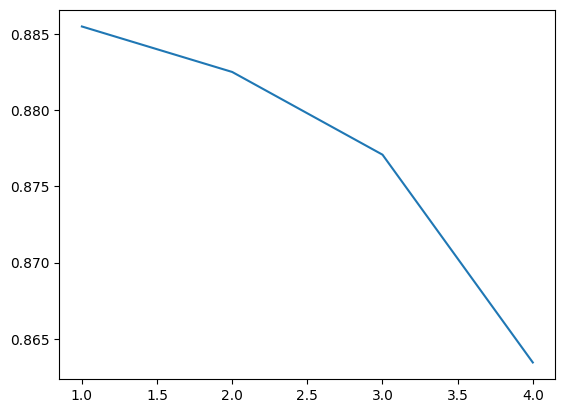

In [180]:
  
plt.plot(grados, scores)
plt.show

Usamos grado 1, igual mucho no importa

# Regresion Proba

In [183]:
log.predict_proba(X_test)

array([[0.2524306 , 0.7475694 ],
       [0.18306665, 0.81693335],
       [0.54580108, 0.45419892],
       ...,
       [0.99577154, 0.00422846],
       [0.9047914 , 0.0952086 ],
       [0.16682164, 0.83317836]])

In [207]:
x = df4.iloc[0].drop(['name_1', 'name_2', 'Winner']).to_numpy()

In [208]:
X_train

array([[4.44e+02, 1.60e+01, 1.40e+00, ..., 3.50e+01, 5.50e+01, 5.00e+01],
       [2.19e+02, 4.00e+00, 8.00e-01, ..., 8.30e+01, 6.00e+01, 6.00e+01],
       [4.79e+02, 1.10e+01, 3.00e-01, ..., 6.80e+01, 7.50e+01, 7.30e+01],
       ...,
       [5.65e+02, 8.00e+00, 1.20e+00, ..., 5.30e+01, 4.50e+01, 2.20e+01],
       [6.15e+02, 1.30e+01, 1.10e+00, ..., 1.80e+02, 1.00e+02, 1.15e+02],
       [3.84e+02, 1.60e+01, 1.08e+01, ..., 7.00e+01, 6.00e+01, 8.00e+01]])

In [209]:
x = x.reshape(1,-1)

In [210]:
log.predict_proba(x)

array([[0.21153523, 0.78846477]])

Peleas de PvPoke

In [236]:
pok1 = df4.loc[df4.pokedex_number_1 ==457].iloc[1]
pok1 = pok1[['name_1', 'pokedex_number_1', 
       'type_number_1', 'height_m_1', 'weight_kg_1',
       'hp_1', 'attack_1', 'defense_1',
       'sp_attack_1', 'sp_defense_1', 'speed_1']]

pok2 = df4.loc[df4.pokedex_number_2 ==504].iloc[1]
pok2 = pok2[['name_2',
       'pokedex_number_2',
       'type_number_2', 'height_m_2',
       'weight_kg_2', 'hp_2',
       'attack_2', 'defense_2', 'sp_attack_2', 'sp_defense_2', 'speed_2']]

In [250]:
pelea = pd.concat([pok1,pok2])

In [253]:
pelea = pelea.drop(['name_1', 'name_2']).to_numpy().reshape(1,-1)

In [254]:
log.predict_proba(pelea)

array([[0.95989477, 0.04010523]])

In [255]:
def pelea(pok1, pok2):
  """Funcion que predice la probabilidad que gane el pokemon 1 o 2"""


  p1 = df4.loc[df4.name_1 == pok1].iloc[1]
  p1 = p1[['name_1', 'pokedex_number_1', 
       'type_number_1', 'height_m_1', 'weight_kg_1',
       'hp_1', 'attack_1', 'defense_1',
       'sp_attack_1', 'sp_defense_1', 'speed_1']]

  p2 = df4.loc[df4.name_2 == pok2].iloc[1]
  p2 = p2[['name_2',
       'pokedex_number_2',
       'type_number_2', 'height_m_2',
       'weight_kg_2', 'hp_2',
       'attack_2', 'defense_2', 'sp_attack_2', 'sp_defense_2', 'speed_2']]  
  
  pelea = pd.concat([p1,p2])
  pelea = pelea.drop(['name_1', 'name_2']).to_numpy().reshape(1,-1)

  return log.predict_proba(pelea)


In [326]:
pelea("Primal Kyogre", "Moltres")

array([[0.57032544, 0.42967456]])

In [330]:
b = df3.loc[df4.name_1 =="Charizard"]
filtro  = b['type_number_2'] == 8
resultado = b[filtro]
resultado

,name_1,name_2,Winner,pokedex_number_1,generation_1,status_1,type_number_1,height_m_1,weight_kg_1,abilities_number_1,total_points_1,hp_1,attack_1,defense_1,sp_attack_1,sp_defense_1,speed_1,catch_rate_1,base_friendship_1,base_experience_1,pokedex_number_2,status_2,type_number_2,height_m_2,weight_kg_2,abilities_number_2,total_points_2,hp_2,attack_2,defense_2,sp_attack_2,sp_defense_2,speed_2,catch_rate_2,base_friendship_2,base_experience_2,type_number_2_1,type_number_2_2
21656,Charizard,Tentacruel,1,6.0,1.0,1,4.0,1.7,90.5,2.0,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,73.0,1,8.0,1.6,55.0,3.0,515.0,80.0,70.0,65.0,80.0,120.0,100.0,60.0,70.0,180.0,17.0,18.0
22686,Charizard,Squirtle,0,6.0,1.0,1,4.0,1.7,90.5,2.0,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,7.0,1,8.0,0.5,9.0,2.0,314.0,44.0,48.0,65.0,50.0,64.0,43.0,45.0,70.0,63.0,17.0,0.0
23517,Charizard,Croconaw,0,6.0,1.0,1,4.0,1.7,90.5,2.0,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,159.0,1,8.0,1.1,25.0,2.0,405.0,65.0,80.0,80.0,59.0,63.0,58.0,45.0,70.0,142.0,17.0,0.0
25265,Charizard,Pelipper,0,6.0,1.0,1,4.0,1.7,90.5,2.0,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,279.0,1,8.0,1.2,28.0,3.0,440.0,60.0,50.0,100.0,95.0,70.0,65.0,45.0,70.0,154.0,17.0,17.0
28885,Charizard,Magikarp,0,6.0,1.0,1,4.0,1.7,90.5,2.0,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,129.0,1,8.0,0.9,10.0,2.0,200.0,20.0,10.0,55.0,15.0,20.0,80.0,255.0,70.0,40.0,17.0,0.0
32610,Charizard,Prinplup,0,6.0,1.0,1,4.0,1.7,90.5,2.0,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,394.0,1,8.0,0.8,23.0,2.0,405.0,64.0,66.0,68.0,81.0,76.0,50.0,45.0,70.0,142.0,17.0,0.0
34101,Charizard,Froakie,0,6.0,1.0,1,4.0,1.7,90.5,2.0,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,656.0,1,8.0,0.3,7.0,2.0,314.0,41.0,56.0,40.0,62.0,44.0,71.0,45.0,70.0,63.0,17.0,0.0
43897,Charizard,Tentacruel,1,6.0,1.0,1,4.0,1.7,90.5,2.0,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,73.0,1,8.0,1.6,55.0,3.0,515.0,80.0,70.0,65.0,80.0,120.0,100.0,60.0,70.0,180.0,17.0,18.0
45040,Charizard,Mega Gyarados,0,6.0,1.0,1,4.0,1.7,90.5,2.0,534.0,78.0,84.0,78.0,109.0,85.0,100.0,45.0,70.0,240.0,130.0,1,8.0,6.5,305.0,1.0,640.0,95.0,155.0,109.0,70.0,130.0,81.0,45.0,70.0,224.0,17.0,12.0


In [336]:
pokedex.loc[pokedex.name =="Charizard"]


,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
6,6,Charizard,1,Normal,Flame Pokémon,2,Fire,Flying,1.7,90.5,2,Blaze,NaN,Solar Power,534,78,84,78,109,85,100,45.0,70.0,240.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
